# California Housing Price Predictor
---
### Name: Sarvesh D. Gaonkadkar
### Roll_no: 21102B0001
### Github_Link: https://github.com/T8jas-lab/ML_projects


## Methodology
---
1. **Data Loading and Splitting**: The dataset is loaded and divided into training and testing sets to maintain a clear distinction for evaluating the model's performance.

2. **Exploratory Data Analysis (EDA)**: EDA is conducted on the training set to examine data distributions and the relationships between different features.

3. **Data Preprocessing**: Essential preprocessing steps include addressing skewed features with logarithmic transformations and encoding categorical variables.

4. **Feature Engineering**: New features are developed to improve the model's predictive capabilities.

5. **Model Training and Evaluation**: A Linear Regression model is trained and evaluated for its performance.

6. **Model Deployment**: The final model is prepared for deployment to make predictions on new data.


## Import Libaries
---

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [79]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

## Data: First Look
---

In [80]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that the 'total_bedrooms' column contains 207 missing values.

- We can either fill in these missing values with the median or drop these rows (remove the rows entirely).

- Both methods are suitable for our task.

In [82]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:
data.dropna(inplace=True) #Removing the rows entirely --

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into training and test datasets
---

In [85]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4475,-118.17,34.08,39.0,787.0,181.0,731.0,179.0,3.2279,<1H OCEAN,158500.0
11030,-117.84,33.79,34.0,2590.0,603.0,1658.0,608.0,2.3780,<1H OCEAN,199600.0
20193,-119.21,34.26,10.0,3150.0,781.0,1582.0,653.0,4.2448,NEAR OCEAN,157300.0
6377,-118.02,34.15,44.0,2267.0,426.0,980.0,372.0,3.6000,INLAND,307400.0
18912,-122.24,38.15,10.0,6817.0,1188.0,4163.0,1135.0,4.4529,NEAR BAY,144100.0
...,...,...,...,...,...,...,...,...,...,...
9656,-120.64,36.99,23.0,2363.0,449.0,1168.0,410.0,2.2794,INLAND,75700.0
5230,-118.24,33.93,37.0,1027.0,258.0,824.0,248.0,1.5132,<1H OCEAN,86300.0
516,-122.24,37.83,52.0,2449.0,312.0,916.0,316.0,8.1194,NEAR BAY,471600.0
17535,-121.88,37.36,42.0,2087.0,402.0,1342.0,423.0,4.2149,<1H OCEAN,199000.0


## Exploratory Data Analysis (EDA)
---

### Visualizing Data Distribution
---

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

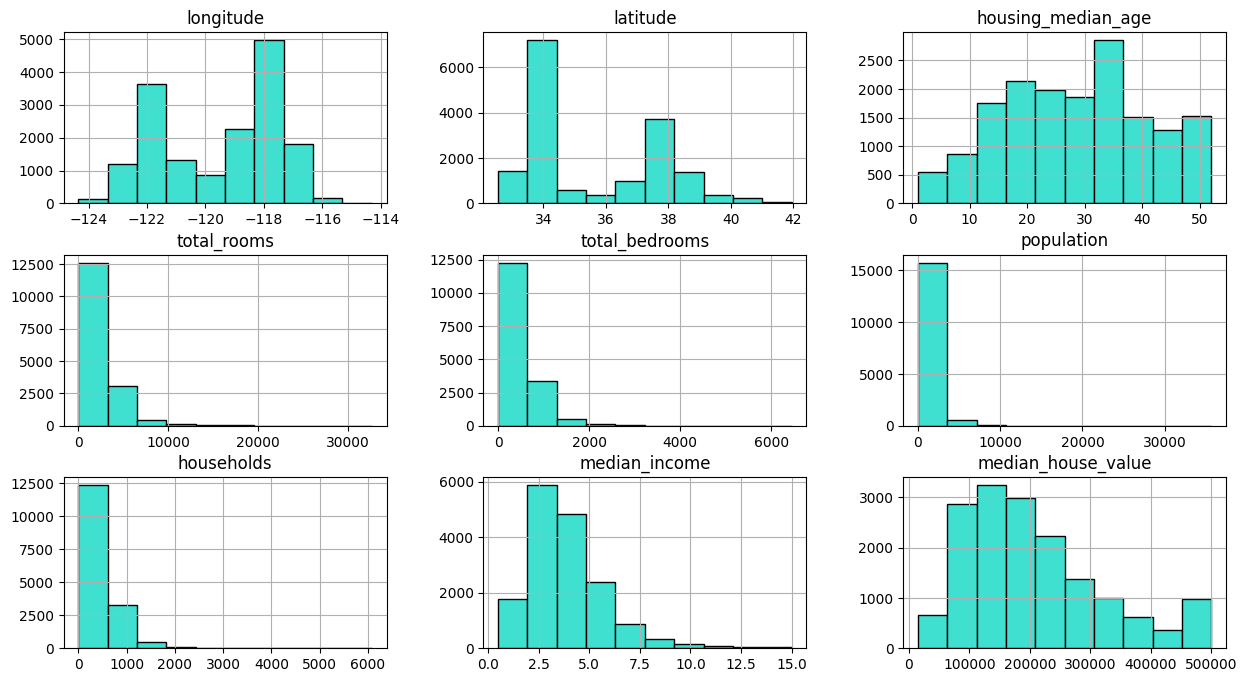

In [86]:
train_data.hist(figsize=(15,8),color = "turquoise",edgecolor = "black")

### Correlation Matrix
---

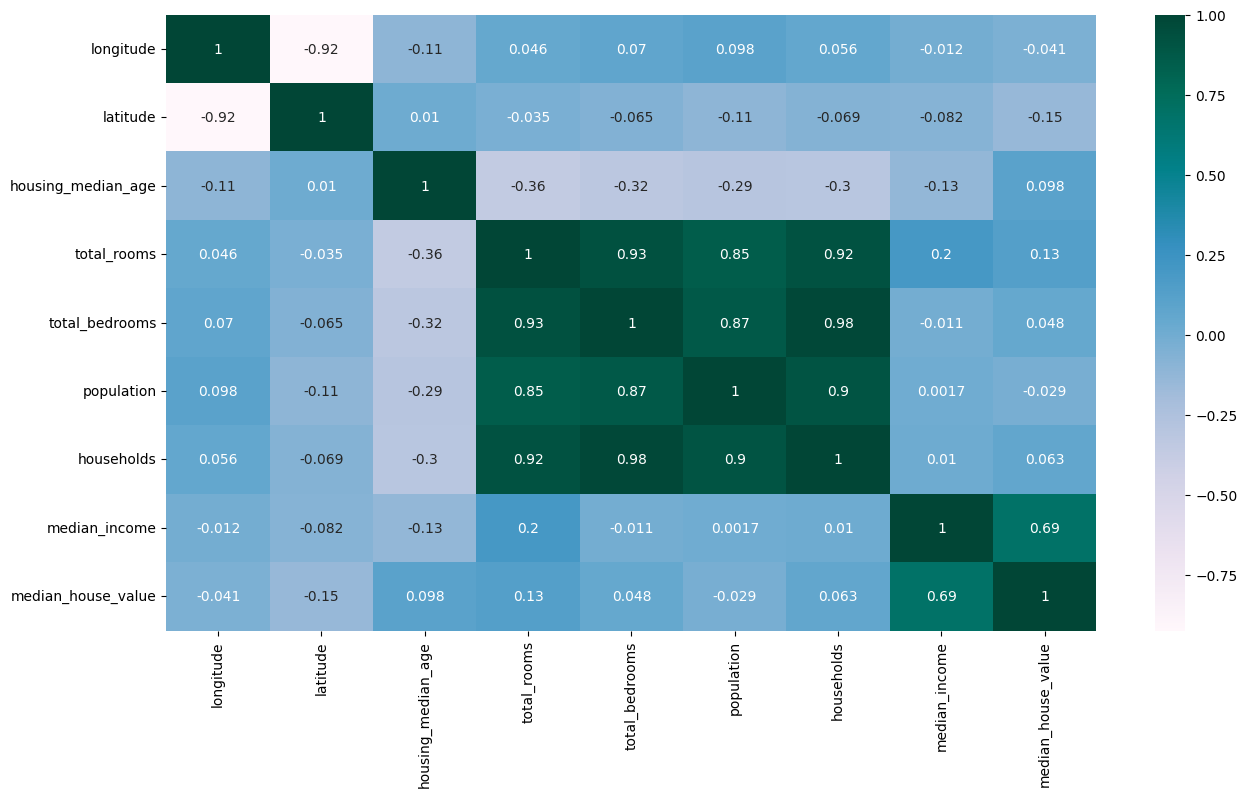

In [87]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="PuBuGn")
plt.show()

## Data Preprocessing
---

In [88]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

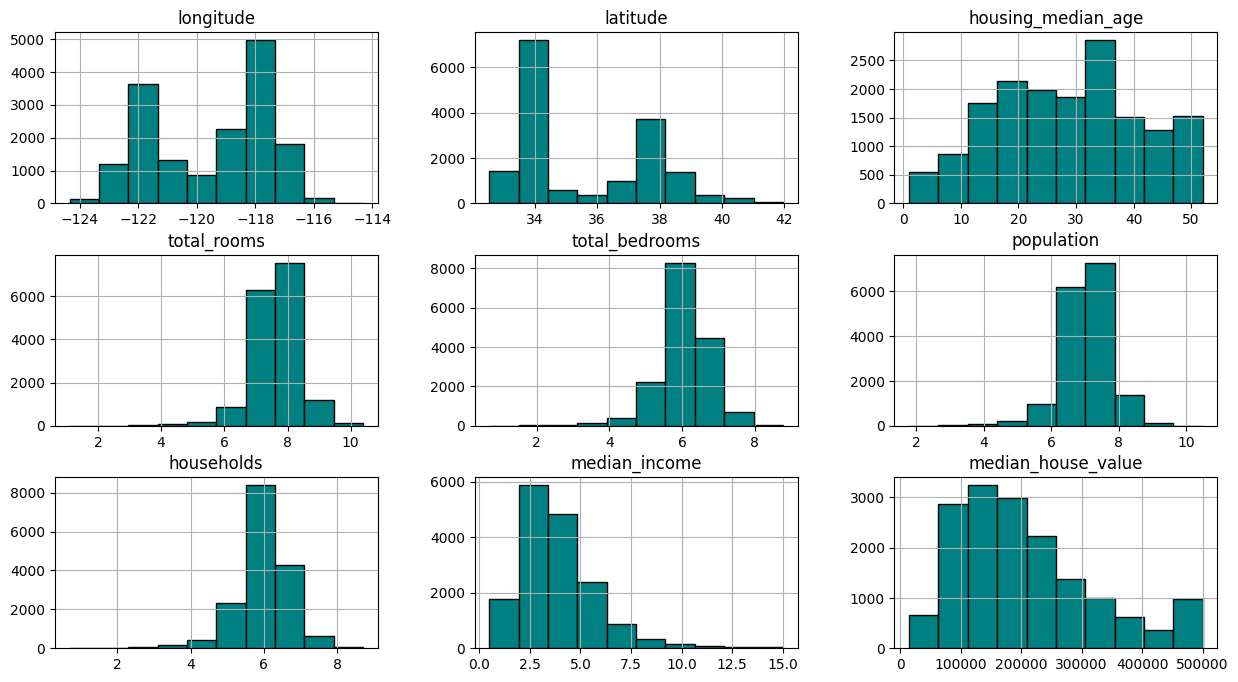

In [89]:
train_data.hist(figsize=(15,8) ,color = "teal", edgecolor = "black")
plt.show()

## Encoding Categorical Features
---

In [90]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7268
INLAND        5182
NEAR OCEAN    2100
NEAR BAY      1792
ISLAND           4
Name: count, dtype: int64

In [91]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [92]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4475,-118.17,34.08,39.0,6.669498,5.204007,6.595781,5.192957,3.2279,158500.0,True,False,False,False,False
11030,-117.84,33.79,34.0,7.859799,6.403574,7.413970,6.411818,2.3780,199600.0,True,False,False,False,False
20193,-119.21,34.26,10.0,8.055475,6.661855,7.367077,6.483107,4.2448,157300.0,False,False,False,False,True
6377,-118.02,34.15,44.0,7.726654,6.056784,6.888572,5.921578,3.6000,307400.0,False,True,False,False,False
18912,-122.24,38.15,10.0,8.827321,7.080868,8.334231,7.035269,4.4529,144100.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,-120.64,36.99,23.0,7.768110,6.109248,7.063904,6.018593,2.2794,75700.0,False,True,False,False,False
5230,-118.24,33.93,37.0,6.935370,5.556828,6.715383,5.517453,1.5132,86300.0,True,False,False,False,False
516,-122.24,37.83,52.0,7.803843,5.746203,6.821107,5.758902,8.1194,471600.0,False,False,False,True,False
17535,-121.88,37.36,42.0,7.643962,5.998937,7.202661,6.049733,4.2149,199000.0,True,False,False,False,False


## Updated Correlation Matrix
---

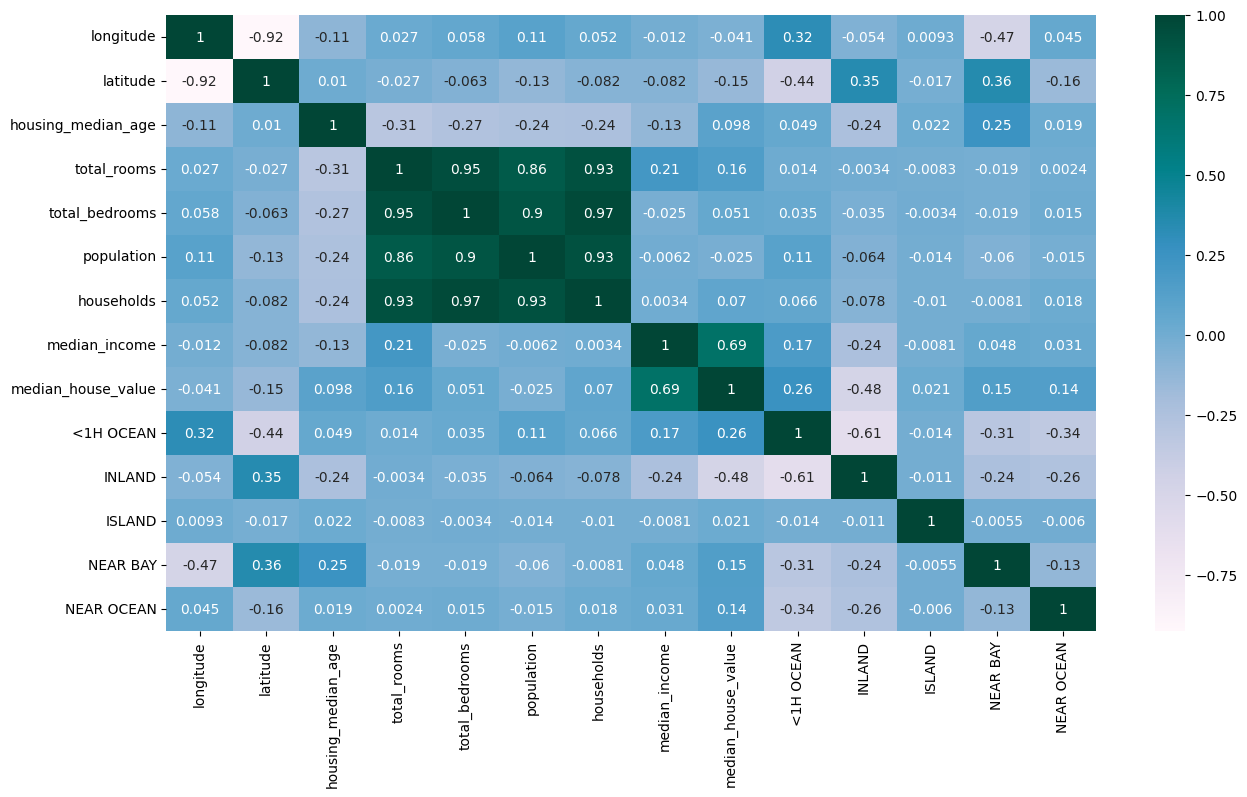

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="PuBuGn")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

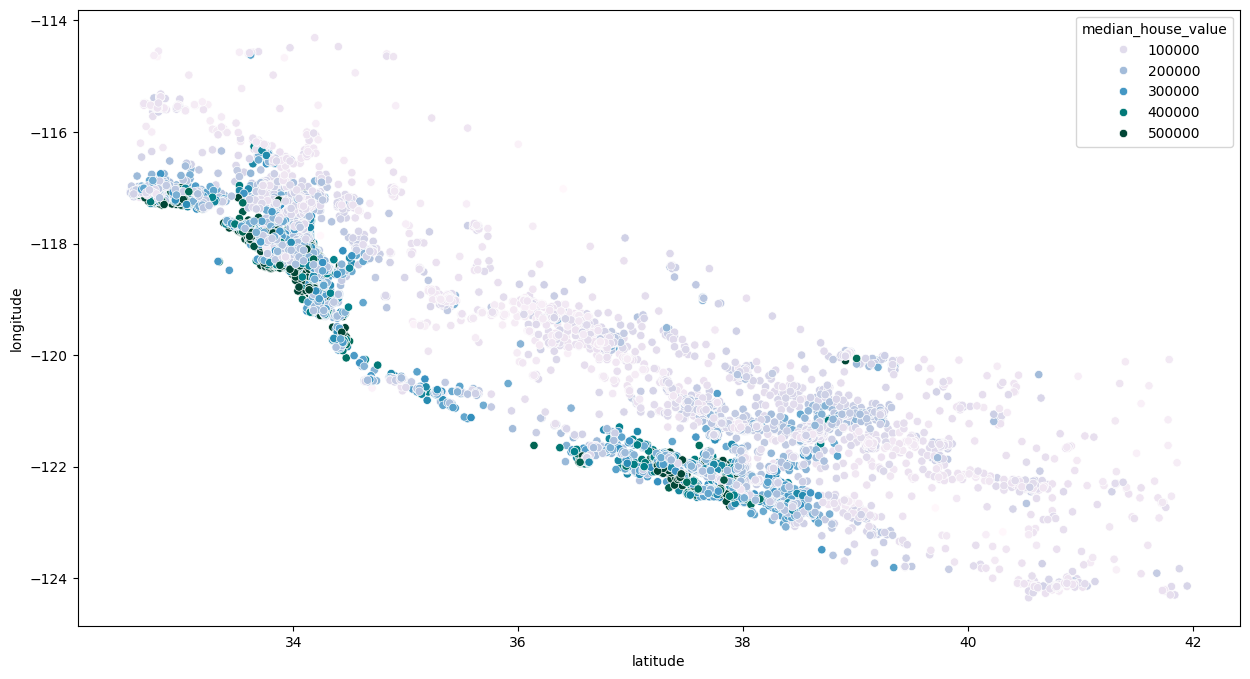

In [94]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='PuBuGn')

## Feature Engineering
---
- household_rooms
- bedroom_ratio

In [95]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

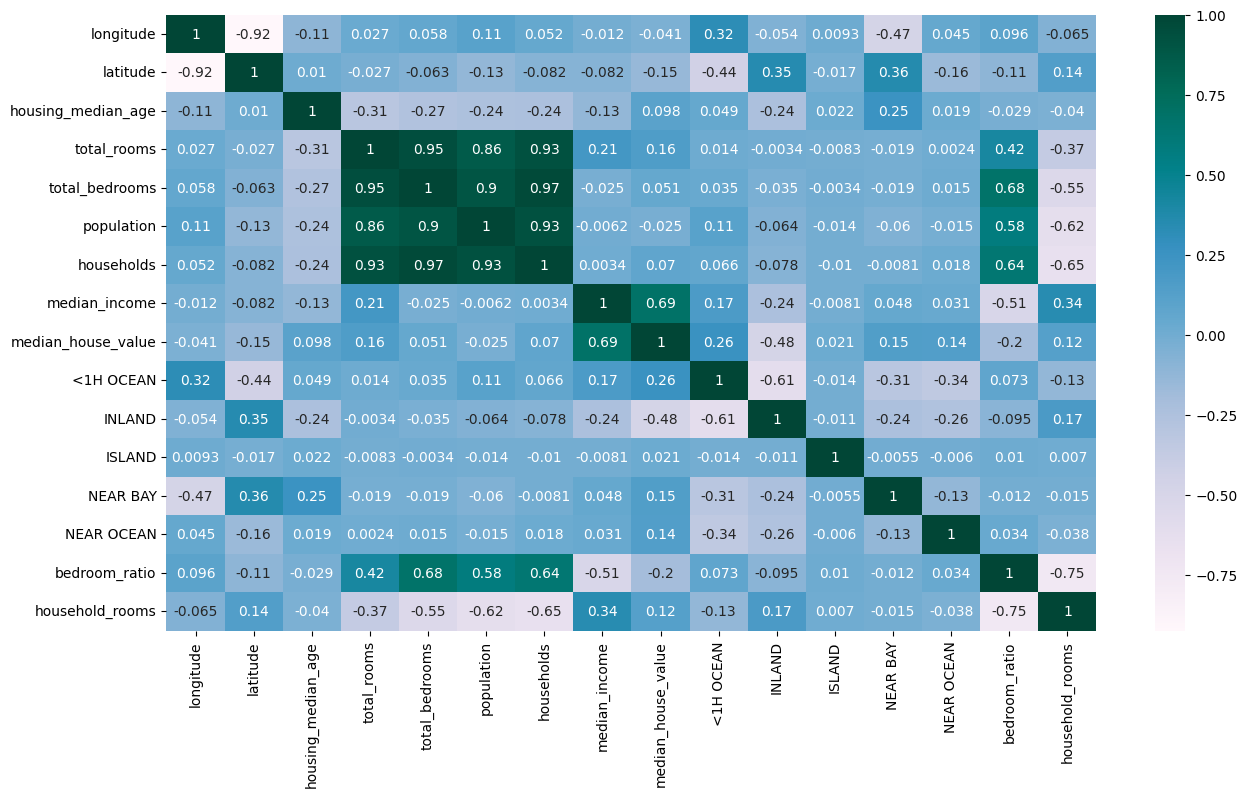

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="PuBuGn")
plt.show()

## Model: Linear Regression
---

## Scaling the Features
---
- StandardScaler.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

## Training the Model
---

In [98]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

## Preparing Test Data
---

In [99]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

## Evaluating Linear Regression
---

In [100]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6756638059009467

## Generating pickle file and scaler file
---

In [102]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## Conclusion
---
1. **Data Preprocessing**:
   - Crucial for normalizing skewed distributions and encoding categorical variables.
   - Enhanced data suitability for linear models.

2. **Feature Engineering**:
   - Introducing new features like bedroom_ratio and household_rooms added valuable information, improving model performance.

3. **Model Evaluation**:
   - Splitting the data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
   - Linear Regression served as a baseline model.

4. **Exploratory Data Analysis (EDA)**:
   - Informed feature selection and engineering through the understanding of feature-target relationships.
   - Data visualization uncovered underlying data patterns.

5. **Model Performance**:
   - Linear Regression was straightforward but had limitations.

6. **Model Deployment**:
   - Deploying the model involved integrating it into a production environment, ensuring it could handle real-time data and provide predictions efficiently.